# Analyse Varicelle

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
from math import floor

from os.path import exists
import requests

## Chargement des données

In [7]:
data_url = "https://www.sentiweb.fr/datasets/incidence-PAY-7.csv"
data_path = 'data-varicelle.csv'

if not exists(data_path):
    print('Download file')
    res = requests.get(data_url, allow_redirects=True)
    open(data_path, 'wb').write(res.content)
    
data = pd.read_csv(data_path, skiprows=1) # La première ligne est un commentaire
data.head()

week  indicator   inc  inc_low  inc_up  inc100  inc100_low  inc100_up  \
0  202248          7  5910     3269    8551       9           5         13   
1  202247          7  6041     3680    8402       9           5         13   
2  202246          7  3033     1392    4674       5           3          7   
3  202245          7  3827     1720    5934       6           3          9   
4  202244          7  4271     2231    6311       6           3          9   

  geo_insee geo_name  
0        FR   France  
1        FR   France  
2        FR   France  
3        FR   France  
4        FR   France

## Vérification des données

In [8]:
data[data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Il n'y a aucune valeur manquantes, on peut passer à la suite.

## Formatage des données

Nos données utilisent une convention inhabituelle: le numéro de
semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète.
  
Un deuxième problème est que Pandas ne comprend pas les numéros de
semaine.  Il faut lui fournir les dates de début et de fin de
semaine. Nous utilisons pour cela la bibliothèque `isoweek`.

Comme la conversion des semaines est devenu assez complexe, nous
écrivons une petite fonction Python pour cela. Ensuite, nous
l'appliquons à tous les points de nos donnés. Les résultats vont
dans une nouvelle colonne 'period'.

In [14]:
def convert_week(year_and_week):
    year = floor(year_and_week / 100)
    week = year_and_week % 100
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = data['week'].apply(convert_week)
data.head()

week  indicator   inc  inc_low  inc_up  inc100  inc100_low  inc100_up  \
0  202248          7  5910     3269    8551       9           5         13   
1  202247          7  6041     3680    8402       9           5         13   
2  202246          7  3033     1392    4674       5           3          7   
3  202245          7  3827     1720    5934       6           3          9   
4  202244          7  4271     2231    6311       6           3          9   

  geo_insee geo_name                period  
0        FR   France 2022-11-28/2022-12-04  
1        FR   France 2022-11-21/2022-11-27  
2        FR   France 2022-11-14/2022-11-20  
3        FR   France 2022-11-07/2022-11-13  
4        FR   France 2022-10-31/2022-11-06

On tri les données.

In [15]:
data = data.set_index('period').sort_index()
data

week  indicator    inc  inc_low  inc_up  inc100  \
period                                                                     
1990-12-03/1990-12-09  199049          7   1143        0    2610       2   
1990-12-10/1990-12-16  199050          7  11079     6660   15498      20   
1990-12-17/1990-12-23  199051          7  19080    13807   24353      34   
1990-12-24/1990-12-30  199052          7  19375    13295   25455      34   
1990-12-31/1991-01-06  199101          7  15565    10271   20859      27   
1991-01-07/1991-01-13  199102          7  16277    11046   21508      29   
1991-01-14/1991-01-20  199103          7  15387    10484   20290      27   
1991-01-21/1991-01-27  199104          7   7913     4563   11263      14   
1991-01-28/1991-02-03  199105          7  10442     6544   14340      18   
1991-02-04/1991-02-10  199106          7  10877     7013   14741      19   
1991-02-11/1991-02-17  199107          7  12337     8077   16597      22   
1991-02-18/1991-02-24  199108          7  13289     8813   17765      23   
1991-02-25/1991-03-03  199109          7  13741     8780   18702      24   
1991-03-04/1991-03-10  199110          7  16643    11372   21914      29   
1991-03-11/1991-03-17  199111          7  15574    11184   19964      27   
1991-03-18/1991-03-24  199112          7  10864     7331   14397      19   
1991-03-25/1991-03-31  199113          7   9567     6041   13093      17   
1991-04-01/1991-04-07  199114          7  12265     7684   16846      22   
1991-04-08/1991-04-14  199115          7  13975     9781   18169      25   
1991-04-15/1991-04-21  199116          7  14857    10068   19646      26   
1991-04-22/1991-04-28  199117          7  13462     8877   18047      24   
1991-04-29/1991-05-05  199118          7  21385    13882   28888      38   
1991-05-06/1991-05-12  199119          7  16739    11246   22232      29   
1991-05-13/1991-05-19  199120          7  19053    12742   25364      34   
1991-05-20/1991-05-26  199121          7  14903     8975   20831      26   
1991-05-27/1991-06-02  199122          7  15452     9953   20951      27   
1991-06-03/1991-06-09  199123          7  11947     7671   16223      21   
1991-06-10/1991-06-16  199124          7  16171    10071   22271      28   
1991-06-17/1991-06-23  199125          7  16169    10700   21638      28   
1991-06-24/1991-06-30  199126          7  17608    11304   23912      31   
...                       ...        ...    ...      ...     ...     ...   
2022-05-09/2022-05-15  202219          7  18593    14181   23005      28   
2022-05-16/2022-05-22  202220          7  23585    19004   28166      36   
2022-05-23/2022-05-29  202221          7  20310    16307   24313      31   
2022-05-30/2022-06-05  202222          7  18916    14941   22891      29   
2022-06-06/2022-06-12  202223          7  18772    14875   22669      28   
2022-06-13/2022-06-19  202224          7  22458    18105   26811      34   
2022-06-20/2022-06-26  202225          7  22246    18011   26481      34   
2022-06-27/2022-07-03  202226          7  16854    12806   20902      25   
2022-07-04/2022-07-10  202227          7  21191    16198   26184      32   
2022-07-11/2022-07-17  202228          7  15471    11028   19914      23   
2022-07-18/2022-07-24  202229          7  14851    10060   19642      22   
2022-07-25/2022-07-31  202230          7   9039     5770   12308      14   
2022-08-01/2022-08-07  202231          7   6896     4170    9622      10   
2022-08-08/2022-08-14  202232          7   7801     4086   11516      12   
2022-08-15/2022-08-21  202233          7   7340        0   17399      11   
2022-08-22/2022-08-28  202234          7   2266      788    3744       3   
2022-08-29/2022-09-04  202235          7   1581      400    2762       2   
2022-09-05/2022-09-11  202236          7   1069      178    1960       2   
2022-09-12/2022-09-18  202237          7   1725      499    2951       3   
2022-09-19/2022-09-25  202238          7   1771      419    3123       3 

Nous vérifions la cohérence des données. Entre la fin d'une période et
le début de la période qui suit, la différence temporelle doit être
zéro, ou au moins très faible. Nous laissons une "marge d'erreur"
d'une seconde.

Ceci s'avère tout à fait juste.

In [17]:
periods = data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

## Visualisation des données

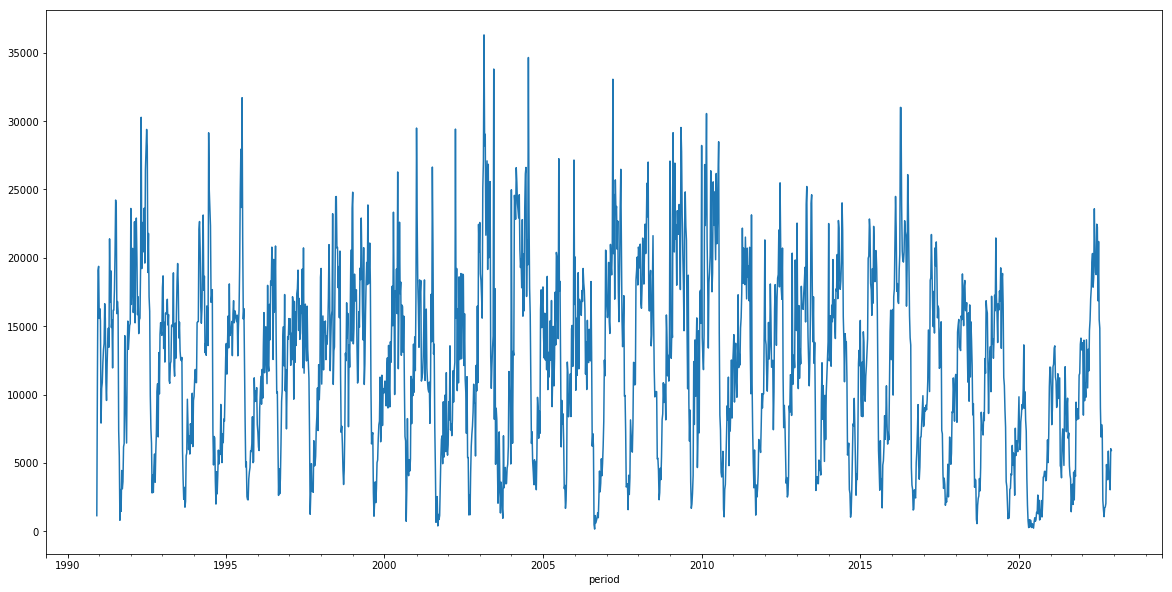

In [20]:
data['inc'].plot(figsize=(20, 10))
plt.show()

On zoom.

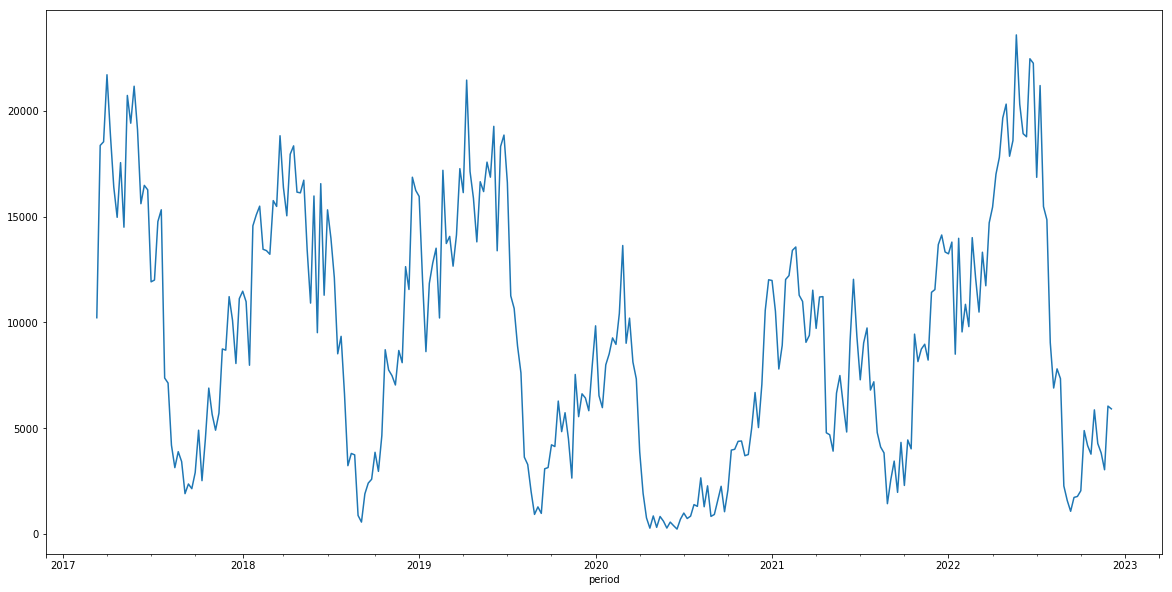

In [23]:
data['inc'][-300:].plot(figsize=(20, 10))
plt.show()

## Etude de l'incidence annuelle

In [27]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(data.index[0].year + 1, # +1 because the first year is not complete
                                    data.index[-1].year)]

year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1], first_september_week[1:]):
    one_year = data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

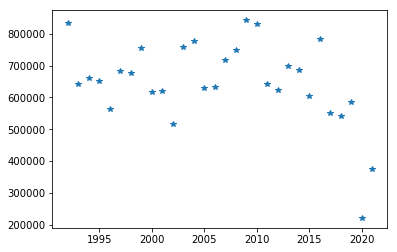

In [29]:
yearly_incidence.plot(style='*')
plt.show()

In [30]:
yearly_incidence.sort_values()

2020    221186
2021    376290
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

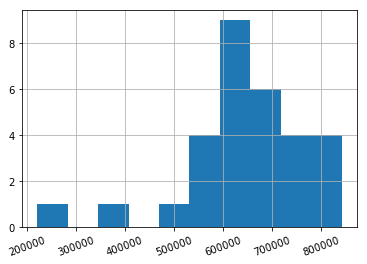

In [32]:
yearly_incidence.hist(xrot=20)
plt.show()